In [84]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [85]:
L = 100

In [86]:
Mp = L-2
dim_Ap = Mp**2
Ap = np.zeros((dim_Ap, dim_Ap))
for i in range(dim_Ap):
    Ap[i,i] = -5
    if i+1<dim_Ap:
        Ap[i+1, i] = 1
        Ap[i, i+1] = 1
    if L-2+i < dim_Ap:
        Ap[L-2+i, i] = 1
        Ap[i, L-2+i] = 1
for m in range(1,L-2):
        Ap[m*Mp, m*Mp-1] = 0
        Ap[m*Mp-1, m*Mp] = 0

A = np.pad(Ap, (L+1,0), "constant", constant_values=0)
A = np.pad(A, (0,L+1), "constant", constant_values=0)
for n in tqdm(range(2,L-1)):
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=1)
    A = np.insert(A, n*L-1, 0, axis=1)

A = A + np.eye(A.shape[0])

100%|██████████| 97/97 [01:18<00:00,  1.23it/s]


In [87]:
A[L+1,L] = 1
for i in range(1, L-1):
    A[i+L,i] = 1

In [88]:
dim_A = A.shape[0]
b = np.zeros(dim_A)
for i in range(1,L-1):
    b[i] = 1000

In [89]:
x_0 = np.zeros(dim_A)
for i in range(1,L-1):
    x_0[i] = 1000
print(x_0.shape)

(10000,)


In [99]:
range_inner = []
for d in range(1, L-1):
    for c in range(1,L-1):
        range_inner.append(d+c*L)

def Jacobi_relaxation(A, b, x_0, epsilon_max = 0.001):
    """
    :param A: 2D Array of shape (n,n)
    :param b:
    :param x_0:
    :param epsilon_max:
    :return: x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)
    """
    x = x_0
    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)
    J = np.matmul(D_inv, D-A)
    epsilon_mat = np.zeros(dim_A)
    epsilon_mat[L+1] = 1
    num_iterations = 0
    #pbar = tqdm(desc="while loop", total = epsilon_max)
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(D_inv,b) + np.matmul(J,x)
        for r in range_inner:
            epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))
        num_iterations += 1
        if num_iterations%100 == 0:
            print(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_JR, num_iter_JR, err_max_JR, err_mean_JR = Jacobi_relaxation(A,b, x_0)

2.3970623764660104
1.2043185135439671
0.8036187793842373
0.6028886015151329
0.4812927976529977
0.3990455862791009
0.339477693721733
0.2940096630332505
0.25795280961631306
0.2286390838126522
0.2043503184200972
0.18390751587389786
0.1664634985702378
0.15142130482445282
0.1383397807397273
0.12686383276229662
0.116730794387081
0.1077246767295037
0.09967984579850508
0.09245560365695837
0.08595496512123191
0.08009053124106913
0.0747580985911327
0.06989442701342341
0.06545816828707984
0.061399495262890014
0.057662156343781135
0.05422032640615271
0.0510496140167902
0.04810590829976036
0.045381677073635274
0.04284748556375462
0.04048358573351152
0.03828370686426297
0.036219588678363834
0.03429442651594172
0.032481913940785034
0.03078522325972699
0.029185674457806954
0.0276803696495449
0.026262645559540942
0.02492098662540343
0.023658374272230276
0.02246323147159046
0.02133049280053001
0.020260876102014436
0.019247909009948216
0.018286702219057815
0.017374499919696973
0.01651141957685809
0.01569

In [129]:
range_inner = []
for d in range(1, L-1):
    for c in range(1,L-1):
        range_inner.append(d+c*L)

def Gauss_Seidel_relaxation(A, b, x_0, epsilon_max = 0.001):
    x = x_0
    D = np.diag(np.diag(A))
    L_mat = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L_mat)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.zeros(dim_A)
    epsilon_mat[101] = 1
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(DL_inv,b) - np.matmul(J,x)
        if np.isnan(x).any() or np.isinf(x).any():
            print("NaN or Inf detected. Stopping simulation.")
            break
        for r_i in range_inner:
            epsilon_mat[r_i] = np.abs(x[r_i]-0.25*(x[r_i+L]+x[r_i-L]+x[r_i+1]+x[r_i-1]))
        num_iterations += 1
        if num_iterations%100 == 0:
            print(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_GSR, num_iter_GSR, err_max_GSR, err_mean_GSR = Gauss_Seidel_relaxation(A,b, x_0)

1.1576806420809476
0.5851341285617764
0.3890339814843742
0.2869216162325188
0.2235034786638721
0.1799161190056111
0.14818312558440994
0.12414779136781817
0.10542591763993414
0.09052356743882228
0.0784016927429434
0.06844610980186872
0.06011886168209912
0.0530967083456062
0.04711109927177404
0.04195670337321644
0.03748365603621551
0.033574265278673465
0.030135479682712685
0.0270932570240916
0.024388297819598392
0.021978534706590835
0.019821872834768328
0.017886756743678234
0.016148996275205718
0.0145852615061699
0.013174915905409534
0.011905434135570658
0.010759536091313748
0.009724568016366675
0.008789656922516542
0.007945308154887698
0.007183098683668732
0.006494128199932447
0.005871333880435259
0.0053083392872110835
0.004799386641821002
0.004339275947330634
0.003923310254464241
0.003547246431566009
0.0032072508636815655
0.0028998595691973605
0.002621942275766287
0.00237067004667324
0.002143486097168079
0.0019380794743710794
0.0017523613130947524
0.0015844434079781422
0.00143261887188

In [162]:
def SO_relaxation(A, b, x_0, epsilon_max = 0.001, w=1):
    x = x_0
    D = np.diag(np.diag(A))
    L_mat = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L_mat)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.zeros(dim_A)
    epsilon_mat[L+1] = 1
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x_GSR = np.matmul(DL_inv,b) - np.matmul(J,x)
        x = w*x_GSR+(1-w)*x
        for i in range(1,L-1):
            x[i] = 1000
        if np.isnan(x).any() or np.isinf(x).any():
            print("NaN or Inf detected. Stopping simulation.")
            break
        for r in range_inner:
            epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))
        num_iterations += 1
        if num_iterations%100 == 0:
            print(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_SOR_05, num_iter_SOR_05, err_max_SOR_05, err_mean_SOR_05 = SO_relaxation(A,b, x_0, w=0.5)

2.2990725064049684
1.162431081802879
0.7796587152865868
0.5861254769645257
0.4690325394153092
0.389492226909681
0.33162654906510625
0.28721306081331477
0.25217388274757013
0.22368579327121552
0.2000166012188629
0.18005280541945012
0.16300323626711588
0.1482890184198027
0.13547601040073687
0.12423171939747135
0.11429688862165222
0.1054981579275136
0.09763983547225052
0.09058234788278696
0.08421604054228737
0.07845035552639956
0.07324172882215407
0.06848845613251342
0.0641369131408851
0.06015596732049744
0.05650271798054973
0.05312797567535199
0.05001731705323209
0.047138758395817604
0.04445931531319047
0.04198125646405515
0.03966287419899572
0.03750554400625106
0.03548351118604387
0.03359386991928659
0.03181701906237322
0.03015312761272071
0.028582130941856576
0.02710922459198173
0.02571721038287933
0.02440281651107057
0.023164829077018112
0.021992077038987645
0.02088165403114317
0.019834271867125608
0.018840803928043215
0.017898336754910815
0.017004731593999622
0.016159656802756217
0.0

In [163]:
x_end_SOR_1, num_iter_SOR_1, err_max_SOR_1, err_mean_SOR_1 = SO_relaxation(A,b, x_0, w=1)

1.1576806420809476
0.5851341285617764
0.3890339814843742
0.2869216162325188
0.2235034786638721
0.1799161190056111
0.14818312558440994
0.12414779136781817
0.10542591763993414
0.09052356743882228
0.0784016927429434
0.06844610980186872
0.06011886168209912
0.0530967083456062
0.04711109927177404
0.04195670337321644
0.03748365603621551
0.033574265278673465
0.030135479682712685
0.0270932570240916
0.024388297819598392
0.021978534706590835
0.019821872834768328
0.017886756743678234
0.016148996275205718
0.0145852615061699
0.013174915905409534
0.011905434135570658
0.010759536091313748
0.009724568016366675
0.008789656922516542
0.007945308154887698
0.007183098683668732
0.006494128199932447
0.005871333880435259
0.0053083392872110835
0.004799386641821002
0.004339275947330634
0.003923310254464241
0.003547246431566009
0.0032072508636815655
0.0028998595691973605
0.002621942275766287
0.00237067004667324
0.002143486097168079
0.0019380794743710794
0.0017523613130947524
0.0015844434079781422
0.00143261887188

In [164]:
x_end_SOR_125, num_iter_SOR_125, err_max_SOR_125, err_mean_SOR_125 = SO_relaxation(A,b, x_0, w=1.25)

0.9292174913614986
0.4679638234362642
0.3076350815198907
0.2234121948686152
0.170963923047168
0.1353348974159303
0.10968145698734588
0.09049416025459323
0.07572207704015455
0.0640788551913829
0.054729240284814296
0.0470972669838261
0.040764637855204455
0.035452961584667264
0.030946123233150047
0.027085273079023864
0.023754025052710404
0.020862416194916023
0.018345700052975644
0.016143666177441673
0.014214030352661666
0.012519258359986907
0.011031071963145678
0.009720818123867048
0.008566959598596213
0.007551449891536777
0.0066570413792703675
0.005868719161838953
0.005173860706918276
0.0045613555018917396
0.004021421448925366
0.003545444108084439
0.0031258358470154235
0.0027559123434457433
0.002429784220851161
0.0021422618958126805
0.0018887719742224363
0.0016652837555852784
0.0014682445908533737
0.0012945230050718237
0.001141358635436518
0.0010063181538271238


In [165]:
x_end_SOR_15, num_iter_SOR_15, err_max_SOR_15, err_mean_SOR_15 = SO_relaxation(A,b, x_0, w=1.5)

0.7760662048003724
0.38857458329596284
0.2517450037194635
0.17977921907714745
0.13528780012859443
0.10535361675397326
0.08410947424670212
0.0684037411676286
0.05643464379335228
0.0470834328891101
0.03961734979424136
0.033554659211745275
0.028548129876128314
0.024373778835013127
0.02085600358819306
0.017875177338197545
0.01533661334798353
0.013165611273251443
0.011309575277010708
0.009717068477840485
0.008349877639744818
0.007177060200604046
0.006169450549691646
0.005303478665354078
0.00455918052097104
0.003919422469891742
0.0033694951548568497
0.0028967670103270393
0.0024903882889475426
0.002141037984529248
0.0018407072243462608
0.0015825137211322726
0.0013605427226934808
0.001169710594354001
0.0010056477618718418


In [166]:
x_end_SOR_175, num_iter_SOR_175, err_max_SOR_175, err_mean_SOR_175 = SO_relaxation(A,b, x_0, w=1.75)

2.795925454729854
92.79860975396582
7038391962.317354
7.521894816476997e+16
8.879971958870476e+22
1.104909161141952e+27
1.766289328425424e+29
7.275503098509443e+30
1.5943342285804944e+32
1.850269118467609e+32
1.99071911179873e+32
3.969998426400793e+32
1.2231809912090357e+33
1.433571978236641e+34
1.471528239043643e+36
4.327021243429844e+37
3.321136173485199e+38
1.796290248718963e+39
2.1418856479765896e+40
1.4657410478215936e+40
3.979062970488124e+41
2.5622617730036707e+41
5.986998089529457e+43
1.1224122348309973e+45
7.655021895742998e+45
3.9380341938239517e+46
1.0343394810608265e+48
2.6690310044814466e+48
7.902431014550164e+48
1.1475024453552539e+49
1.0376999406343617e+51
2.6734077667583963e+52
2.4719097425119525e+53
6.555845433479462e+53
3.8783029577793315e+54
1.5391443572173353e+55
4.839645859299426e+54
1.0051800970859237e+56
2.0778299570582806e+57
3.2029576243417606e+58
4.098489209819732e+58
1.2836042148026425e+60
1.730741925705217e+61
8.790237955062219e+60
1.0261124346715226e+63
1.2

C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3121185709.py:20: RuntimeWarning: overflow encountered in scalar add
  epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))
C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3121185709.py:20: RuntimeWarning: overflow encountered in scalar subtract
  epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))


NaN or Inf detected. Stopping simulation.


C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3121185709.py:13: RuntimeWarning: overflow encountered in add
  x = w*x_GSR+(1-w)*x


In [167]:
x_end_SOR_199, num_iter_SOR_199, err_max_SOR_199, err_mean_SOR_199 = SO_relaxation(A,b, x_0, w=1.99)

77512164495.8667
9.791677811016442e+21
1.6065100653190957e+35
2.0448206301863978e+50
2.5189542004943826e+66
4.2057854930730256e+79
2.1170613004683207e+90
9.044388211735711e+98
1.388502234283839e+106
2.6177022580266737e+112
6.150793417010794e+118
1.3105004105005727e+132
1.2164250515762184e+142
1.1146261439763836e+153
8.952435997642076e+161
1.706513031605692e+170
3.52505982955102e+178
5.501511399860927e+185
1.997772336768494e+195
1.8057596763104245e+205
8.766465410228494e+214
1.724275615522713e+225
8.163215500221069e+232
2.7854585755467617e+242
1.4558757911821513e+249
5.517786953243411e+257
1.0657279263125539e+268
3.436907939350966e+278
1.534999633163319e+288
8.326302210497498e+295
1.2845543438156859e+306
NaN or Inf detected. Stopping simulation.


C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3121185709.py:20: RuntimeWarning: overflow encountered in scalar subtract
  epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))
C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3121185709.py:20: RuntimeWarning: overflow encountered in scalar add
  epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))
C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3121185709.py:13: RuntimeWarning: overflow encountered in add
  x = w*x_GSR+(1-w)*x


In [168]:
x_end_SOR_3, num_iter_SOR_3, err_max_SOR_3, err_mean_SOR_3 = SO_relaxation(A,b, x_0, w=3)

6.2848742344940805e+38
4.443168760373986e+77
5.7534713521623944e+116
6.087502574716003e+155
9.898030880421845e+195
3.997408685079633e+236
4.993735859594396e+276
NaN or Inf detected. Stopping simulation.


C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3121185709.py:13: RuntimeWarning: overflow encountered in multiply
  x = w*x_GSR+(1-w)*x


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


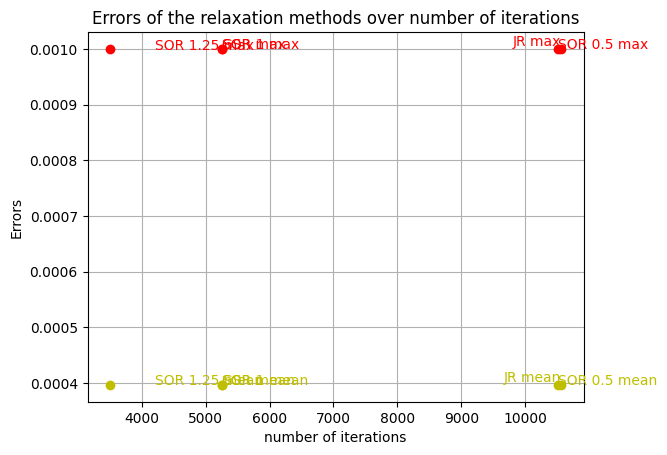

In [169]:
plt.plot(num_iter_JR, err_max_JR, "ro", label = "JR max error")
plt.plot(num_iter_GSR, err_max_GSR, "ro", label= "GSR max error")
plt.plot(num_iter_SOR_199, err_max_SOR_199, "ro", label = "SOR (w=1.99) max error")
plt.plot(num_iter_SOR_175,err_max_SOR_175, "ro", label = "SOR (w=1.75) max error")
plt.plot(num_iter_SOR_15, err_max_SOR_15, "ro", label = "SOR (w=1.5) max error")
plt.plot(num_iter_SOR_05, err_max_SOR_05, "ro", label = "SOR (w=0.5) max error")
plt.plot(num_iter_SOR_1, err_max_SOR_1, "ro", label = "SOR (w=1) max error")

plt.plot(num_iter_JR, err_mean_JR, "yo", label= "JR mean error")
plt.plot(num_iter_GSR, err_mean_GSR, "yo", label = "GSR mean error")
plt.plot(num_iter_SOR_199, err_mean_SOR_199, "yo", label = "SOR (w=1.99) mean error")
plt.plot(num_iter_SOR_175,err_mean_SOR_175, "yo", label = "SOR (w=1.75) mean error")
plt.plot(num_iter_SOR_15, err_mean_SOR_15, "yo", label = "SOR (w=1.5) mean error")
plt.plot(num_iter_SOR_05, err_mean_SOR_05, "yo", label = "SOR (w=0.5) mean error")
plt.plot(num_iter_SOR_1, err_mean_SOR_1, "yo", label = "SOR (w=1) mean error")

plt.text(num_iter_JR, err_max_JR, "JR max", color='r',  ha='right', va='bottom')
plt.text(num_iter_JR, err_mean_JR, "JR mean", color='y',  ha='right', va='bottom')
plt.text(num_iter_GSR, err_max_GSR, "GSR max", color="r")
plt.text(num_iter_GSR, err_mean_GSR, "GSR mean", color="y")
plt.text(num_iter_SOR_05, err_max_SOR_05, "SOR 0.5 max", color="r")
plt.text(num_iter_SOR_05, err_mean_SOR_05, "SOR 0.5 mean", color="y")
plt.text(num_iter_SOR_1, err_max_SOR_1, "SOR 1 max", color="r")
plt.text(num_iter_SOR_1, err_mean_SOR_1, "SOR 1 mean", color="y")
plt.text(num_iter_SOR_125, err_max_SOR_125, "SOR 1.25 max", color="r")
plt.text(num_iter_SOR_125, err_mean_SOR_125, "SOR 1.25 mean", color="y")
plt.text(num_iter_SOR_175, err_max_SOR_175, "SOR 1.75 max", color="r")
plt.text(num_iter_SOR_175, err_mean_SOR_175, "SOR 1.75 mean", color="y")
plt.text(num_iter_SOR_199, err_max_SOR_199, "SOR 199 max", color="r")
plt.text(num_iter_SOR_199, err_mean_SOR_199, "SOR 199 mean", color="y")

plt.title("Errors of the relaxation methods over number of iterations")
plt.ylabel("Errors")
plt.xlabel("number of iterations")
plt.grid()
#plt.legend()

In [141]:
def potential_square(x, y, n_max):
    phi = 0
    for n in range(1,n_max):
        phi += (400/(n*np.pi))*np.sin(n*np.pi*y/L)*np.exp(-n*np.pi*x)
    return phi

arr_phi_1 = np.zeros((L,L))
arr_phi_10 = np.zeros((L,L)) 
arr_phi_100 = np.zeros((L,L))
arr_phi_1000 = np.zeros((L,L))

for i in range(L):
    for j in range(L):
        arr_phi_1[i][j] = potential_square(i,j,1)
        arr_phi_10[i][j] = potential_square(i,j,10)
        arr_phi_100[i][j] = potential_square(i,j,100)
        arr_phi_1000[i][j] = potential_square(i,j,1000)

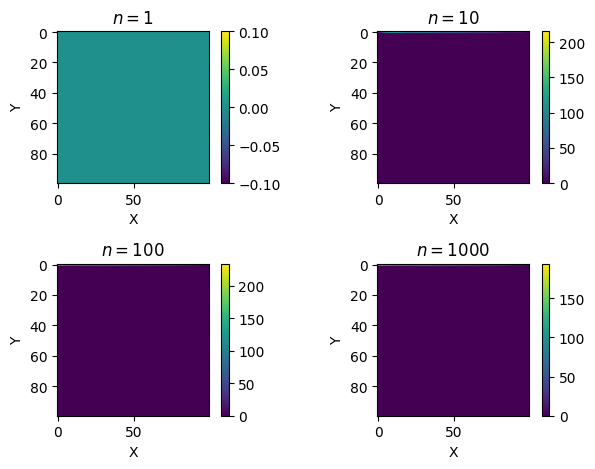

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=2)

im1 = ax[0, 0].imshow(arr_phi_1)
im2 = ax[0, 1].imshow(arr_phi_10)
im3 = ax[1, 0].imshow(arr_phi_100)
im4 = ax[1, 1].imshow(arr_phi_1000)

cbar1 = fig.colorbar(im1, ax=ax[0, 0])
cbar2 = fig.colorbar(im2, ax=ax[0, 1])
cbar3 = fig.colorbar(im3, ax=ax[1, 0])
cbar4 = fig.colorbar(im4, ax=ax[1, 1])

ax[0, 0].set_xlabel('X')
ax[0, 0].set_ylabel('Y')
ax[0, 0].set_title("$n=1$")

ax[0, 1].set_xlabel('X')
ax[0, 1].set_ylabel('Y')
ax[0, 1].set_title("$n=10$")

ax[1, 0].set_xlabel('X')
ax[1, 0].set_ylabel('Y')
ax[1, 0].set_title("$n=100$")

ax[1, 1].set_xlabel('X')
ax[1, 1].set_ylabel('Y')
ax[1, 1].set_title("$n=1000$")

plt.tight_layout()
plt.show()

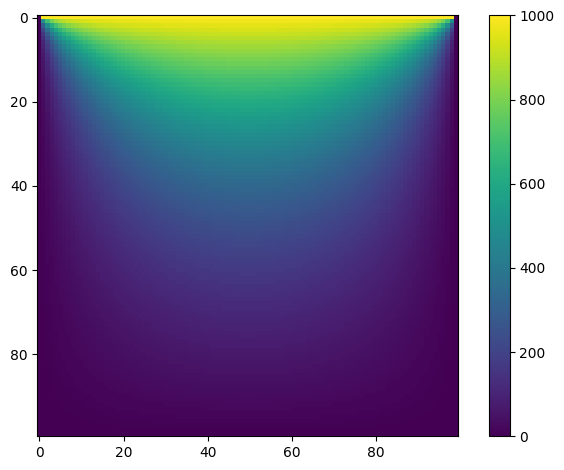

In [100]:
x_end_JR_reshaped = x_end_JR.reshape((L,L))
fig_1, ax_1 = plt.subplots()
im = ax_1.imshow(x_end_JR_reshaped)
cbar = fig_1.colorbar(im, ax=ax_1)
plt.tight_layout()
plt.show()

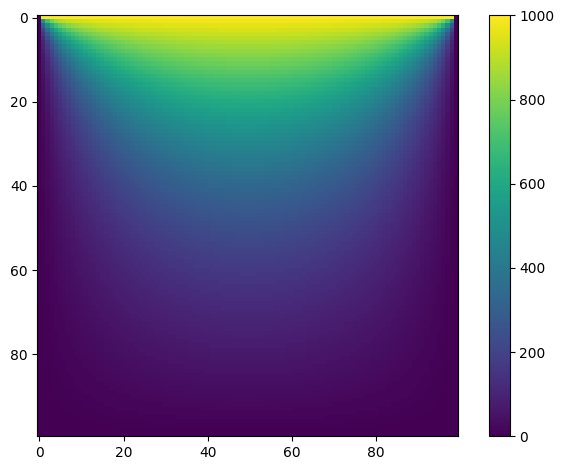

In [170]:
x_end_SOR_1_reshaped = x_end_SOR_1.reshape((L,L))
fig_1, ax_1 = plt.subplots()
im = ax_1.imshow(x_end_SOR_1_reshaped)
cbar = fig_1.colorbar(im, ax=ax_1)
plt.tight_layout()
plt.show()

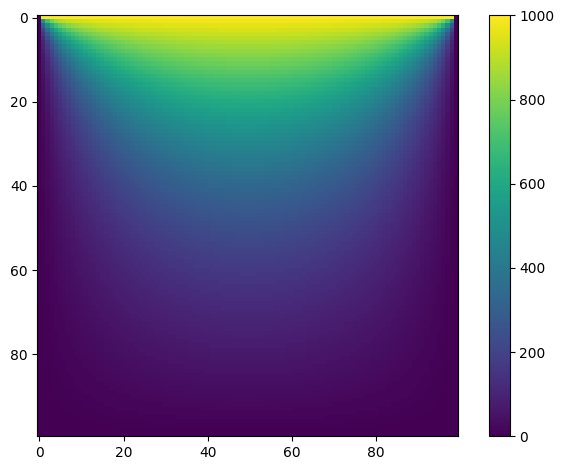

In [144]:
x_end_GSR_reshaped = x_end_GSR.reshape((L,L))
fig_1, ax_1 = plt.subplots()
im = ax_1.imshow(x_end_GSR_reshaped)
cbar = fig_1.colorbar(im, ax=ax_1)
plt.tight_layout()
plt.show()